## Social Media Sentiment Analysis

In [42]:
import nltk
# nltk.download()

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [44]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment','id','date','query','user','text']
df.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [45]:
df = df[['Sentiment','text']]

In [46]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [47]:
df.Sentiment.value_counts()

0    799996
4    248576
Name: Sentiment, dtype: int64

In [48]:
df['Sentiment'] = df['Sentiment'].replace({4:1})

* 0 represent Negative sentiment
* 1 represents Positive sentiment

#### Visualizing the count

(array([799996.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 248576.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

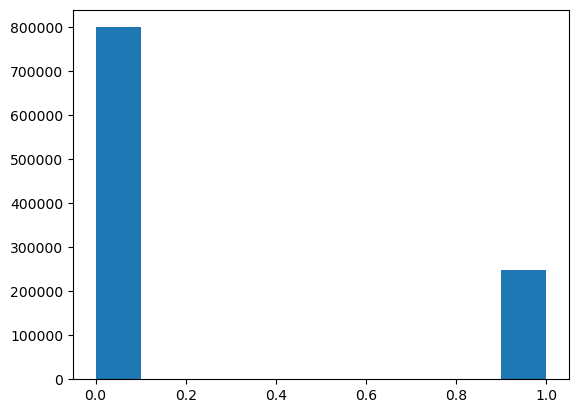

In [49]:
plt.hist(df["Sentiment"])

In [50]:
df

,Sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1048567,1,My GrandMa is making Dinenr with my Mum
1048568,1,Mid-morning snack time... A bowl of cheese noo...
1048569,1,@ShaDeLa same here say it like from the Termi...
1048570,1,@DestinyHope92 im great thaanks wbuu?


In [51]:
df.isna().sum().sum()

0

**Inference: The data is unbalanced therfore we will downsample the data to have same count for each sentiment**

## Downsampling the dataset

In [52]:
from sklearn.utils import resample

In [53]:
## majority class 0
df_majority = df[df['Sentiment']==0]
## minority class 1
df_minority = df[df['Sentiment']==1]

In [54]:
df_minority.shape

(248576, 2)

In [55]:
# downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,   
                                 n_samples=len(df_minority),    
                                 random_state=1234) 

In [56]:
df = df_majority_downsampled.append(df_minority)
df.head()

,Sentiment,text
74567,0,Wow slept for almost 12hours. Sleepy me!! Uni ...
668722,0,gets bored with an idea too easily ... like tw...
286706,0,To my girls - sorry i've been a homebody latel...
632911,0,BK once again for the weekend...If it wasnt fo...
356735,0,@DonnieWahlberg Now why didn't you do that las...


#### Visualizing after downsampling

248576 data for each class

## Data Preprocessing

1. removing stop words
2. removing punctuations
3. Lemmatizing
4. removing tags
5. removing special characters 
6. lowercase conversion

In [57]:
## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
corpus = [stemmer.stem(w) for w in corpus]
print(len(corpus))
print(corpus[0])

497152
wow slept for almost 12hours. sleepy me!! uni now, boo! i wanna stay home, drink tea and watch house... 


In [58]:
%%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: total: 38.8 s
Wall time: 38.7 s


#### Storing the cleaned data seperately

In [59]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [60]:
data_cleaned['Sentiment'].value_counts()

0    248576
1    248576
Name: Sentiment, dtype: int64

In [61]:
data_cleaned.head()

,text,Sentiment
0,wow slept almost hour sleepy uni boo wanna sta...,0
1,get bored idea easily like twitter,0
2,girl sorry homebody lately dont feel well does...,0
3,bk weekend wasnt puppy stay as,0
4,donniewahlberg last night atlanta,0


## Separate positive and negative data

In [62]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[wow, slept, almost, hour, sleepy, uni, boo, w...",0
1,"[get, bored, idea, easily, like, twitter]",0
2,"[girl, sorry, homebody, lately, dont, feel, we...",0
3,"[bk, weekend, wasnt, puppy, stay, as]",0
4,"[donniewahlberg, last, night, atlanta]",0


In [63]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

## Classification 
### Naive Bayes using nltk without cross validation

In [64]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_list)
negative_tokens_for_model = get_tweets_for_model(negative_list)

In [65]:
import random
from sklearn.model_selection import train_test_split

positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data, test_data = train_test_split(dataset, test_size = 0.33, random_state = 42)

In [66]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

print(classifier.show_most_informative_features(10))

Training Accuracy is: 86.0
Testing Accuracy is: 76.0
Most Informative Features
             squarespace = True           Negati : Positi =     63.2 : 1.0
                hayfever = True           Negati : Positi =     51.2 : 1.0
                    iran = True           Negati : Positi =     37.2 : 1.0
                 saddest = True           Negati : Positi =     34.9 : 1.0
                  booooo = True           Negati : Positi =     32.9 : 1.0
              devastated = True           Negati : Positi =     32.2 : 1.0
                   lvatt = True           Negati : Positi =     28.9 : 1.0
                  farrah = True           Negati : Positi =     28.6 : 1.0
            followfriday = True           Positi : Negati =     25.2 : 1.0
              antibiotic = True           Negati : Positi =     24.9 : 1.0
None


### TFIDF (Term Frequency Inverse Document Frequency)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['Sentiment']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

In [69]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [70]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

### Multinomial NB

training accuracy =  85.0
              precision    recall  f1-score   support

           0       0.83      0.88      0.85    166545
           1       0.87      0.82      0.85    166546

    accuracy                           0.85    333091
   macro avg       0.85      0.85      0.85    333091
weighted avg       0.85      0.85      0.85    333091



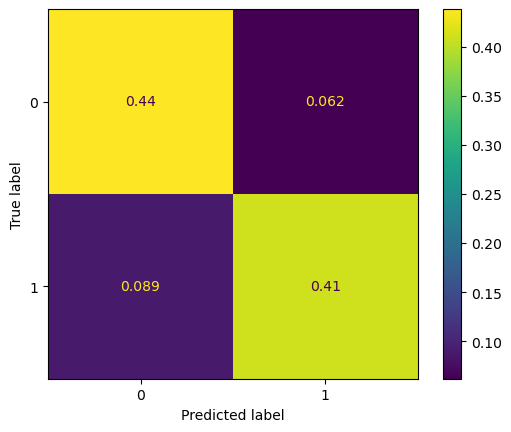

testing accuracy =  76.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     82031
           1       0.78      0.73      0.75     82030

    accuracy                           0.76    164061
   macro avg       0.76      0.76      0.76    164061
weighted avg       0.76      0.76      0.76    164061



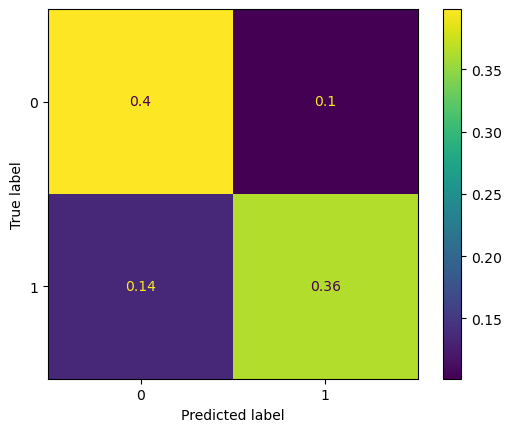

[0.75549879 0.75482495 0.75685407 0.75488283 0.74978377]
Accuracy of Model with Cross Validation is: 75.43688819798007


In [71]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)
accuracy = cross_val_score(NB, vector, y, scoring='accuracy', cv = 5)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

### Bernoulli NB

training accuracy =  84.0
              precision    recall  f1-score   support

           0       0.83      0.87      0.85    166545
           1       0.86      0.82      0.84    166546

    accuracy                           0.84    333091
   macro avg       0.84      0.84      0.84    333091
weighted avg       0.84      0.84      0.84    333091



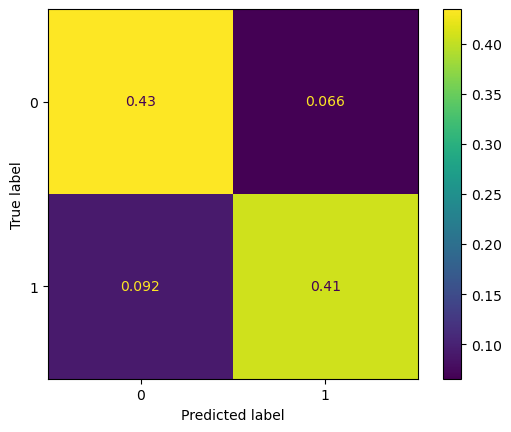

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     82031
           1       0.79      0.73      0.76     82030

    accuracy                           0.77    164061
   macro avg       0.77      0.77      0.77    164061
weighted avg       0.77      0.77      0.77    164061



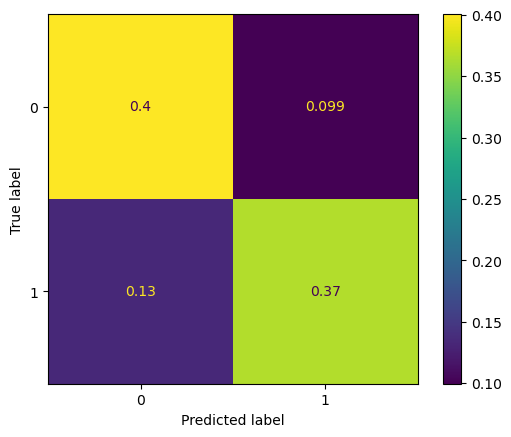

[0.76053746 0.76171415 0.76391431 0.76103792 0.7555969 ]
Accuracy of Model with Cross Validation is: 76.05601483423278


In [72]:
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
y_train_pred = BNB.predict(X_train)
y_test_pred = BNB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)
accuracy = cross_val_score(BNB, vector, y, scoring='accuracy', cv = 5)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

### Linear SVC

training accuracy =  90.0
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    166545
           1       0.90      0.90      0.90    166546

    accuracy                           0.90    333091
   macro avg       0.90      0.90      0.90    333091
weighted avg       0.90      0.90      0.90    333091



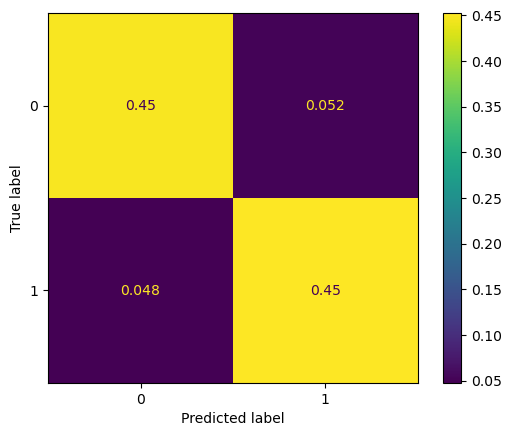

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     82031
           1       0.76      0.78      0.77     82030

    accuracy                           0.77    164061
   macro avg       0.77      0.77      0.77    164061
weighted avg       0.77      0.77      0.77    164061



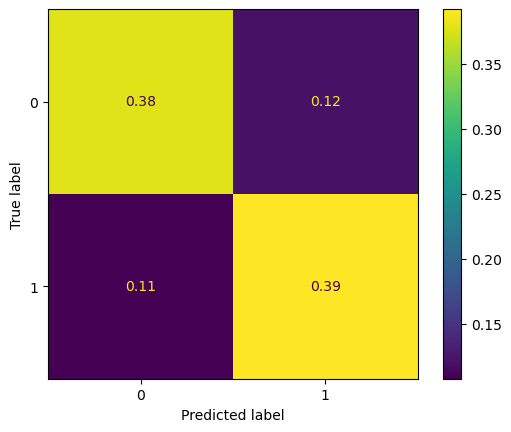

[0.76583762 0.76784906 0.7670522  0.76539274 0.76103792]
Accuracy of Model with Cross Validation is: 76.54339058902198


In [73]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)
accuracy = cross_val_score(svc, vector, y, scoring='accuracy', cv = 5)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

### Logistic regression

training accuracy =  83.0
              precision    recall  f1-score   support

           0       0.84      0.81      0.82    166545
           1       0.82      0.84      0.83    166546

    accuracy                           0.83    333091
   macro avg       0.83      0.83      0.83    333091
weighted avg       0.83      0.83      0.83    333091



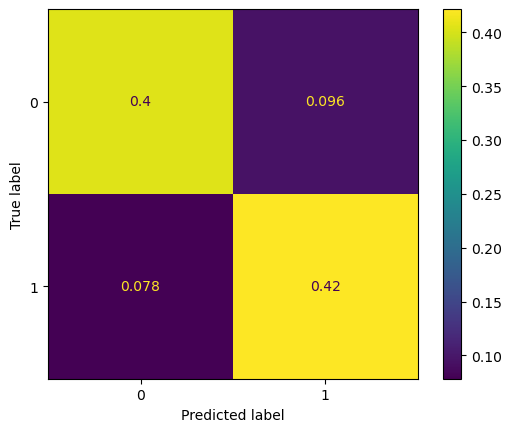

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     82031
           1       0.76      0.80      0.78     82030

    accuracy                           0.78    164061
   macro avg       0.78      0.78      0.78    164061
weighted avg       0.78      0.78      0.78    164061



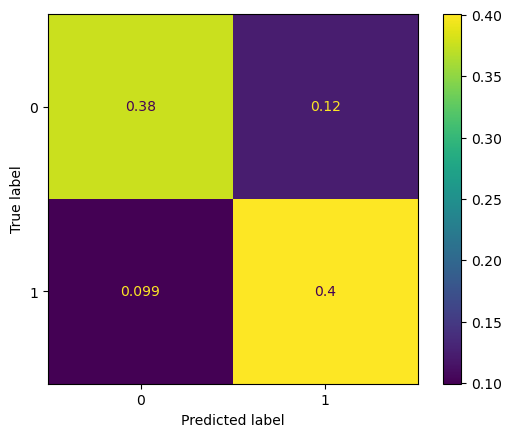

[0.77514055 0.77642787 0.77629488 0.77406215 0.77328774]
Accuracy of Model with Cross Validation is: 77.5042639910642


In [74]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)
accuracy = cross_val_score(lr, vector, y, scoring='accuracy', cv = 5)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

## Conclusion

|Model|Accuracy After Cross Validation|
|---|---|
|Multinomial NB|75.4%|
|Bernoulli NB|76%|
|Linear SVC|76.5%|
|Logistic Regression|77.5%|